<a href="https://colab.research.google.com/github/RogerUltimate/-Keras-study/blob/main/7_3_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Normalizationhttps://huidea.tistory.com/39

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd #데이터프레임 분석
from sklearn.preprocessing import StandardScaler #ML 분석
import seaborn as sns #데이터시각화
import matplotlib.pyplot as plt #그래프
import scipy as sp  #통계함수
import scipy.stats

# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


표준화

In [ ]:
# 원래 데이터들의 평균과 분산 확인 
print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

print("\n=========== 표준화 ==============\n")

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

=========== 표준화 ==============

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


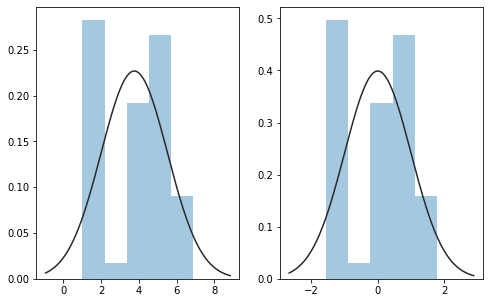

In [ ]:
# 각 값들의 정규 분포 모양 비교비교 
f,ax = plt.subplots(1,2,figsize=(8,5))

# 표준화 전 정규분포 
x0 = iris_df['petal length (cm)'].dropna().values
sns.distplot(x0, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #커널 밀도 함수, 러그밀도함수 는 안보이고(False) / 정규분포만 보이게(Fit)

# 표준화 이후 정규 분포 
x1 = iris_df_scaled['petal length (cm)'].values
sns.distplot(x1, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) 
plt.show()

이상치 발견, 제거

In [ ]:
# check Z score 
df_Zscore = pd.DataFrame()
outlier_dict = {}
outlier_idx_list = []

for one_col in iris_df_scaled.columns:
    print("Check",one_col)
    df_Zscore[f'{one_col}_Zscore'] = sp.stats.zscore(iris_df_scaled[one_col])
    outlier_dict[one_col] = df_Zscore[f'{one_col}_Zscore'][(df_Zscore[f'{one_col}_Zscore']>2)|(df_Zscore[f'{one_col}_Zscore']<-2)]
    outlier_idx_list.append(list(outlier_dict[one_col].index))
    if len(outlier_dict[one_col]):
        print(one_col,'Has outliers\n', outlier_dict[one_col])
    else:
        print(one_col,"Has Not outlier")
    print()


print("Before", iris_df_scaled.shape)
all_outlier_idx = sum(outlier_idx_list,[])
iris_df_scaled = iris_df_scaled.drop(all_outlier_idx)
print("After (drop outlier)", iris_df_scaled.shape)

Check sepal length (cm)
sepal length (cm) Has outliers
 105    2.128516
117    2.249683
118    2.249683
122    2.249683
131    2.492019
135    2.249683
Name: sepal length (cm)_Zscore, dtype: float64

Check sepal width (cm)
sepal width (cm) Has outliers
 14    2.169988
15    3.090775
32    2.400185
33    2.630382
60   -2.433947
Name: sepal width (cm)_Zscore, dtype: float64

Check petal length (cm)
petal length (cm) Has Not outlier

Check petal width (cm)
petal width (cm) Has Not outlier

Before (150, 4)
After (drop outlier) (139, 4)


정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


깊이별 분리 합성곱


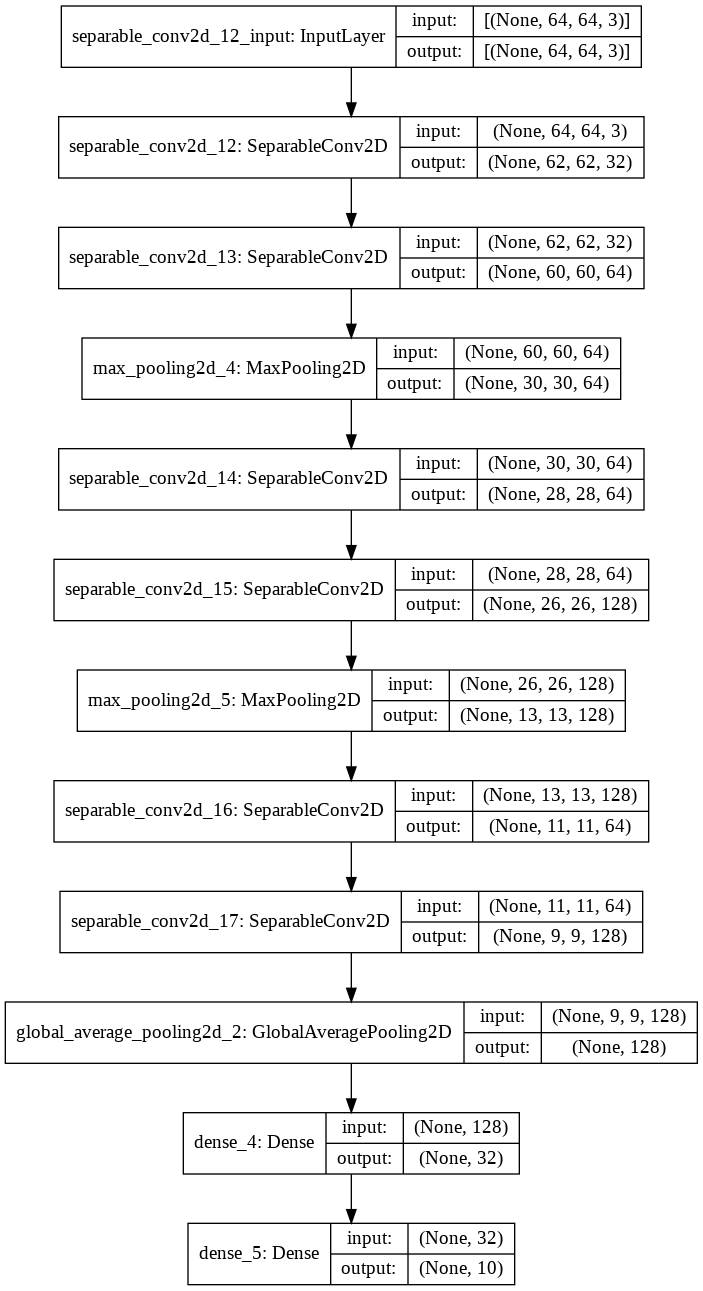

In [ ]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

height = 64
width = 64
channels = 3
num_classes = 10

model = Sequential()
model.add(layers.SeparableConv2D(32, 3, activation='relu', input_shape=(height, width, channels,)))
model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))

model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.SeparableConv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))

model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.SeparableConv2D(128, 3, activation='relu'))
model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossenetopy')

# model.summary()
keras.utils.plot_model(model, show_shapes=True)

Hyper Parameter Tuning \ 
Keras Tuner

In [11]:
!pip install keras-tuner -q

     |████████████████████████████████| 102kB 5.9MB/s 


In [12]:
from tensorflow import keras
import numpy as np

(x, y), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x[:-10000]
x_val = x[-10000:]
y_train = y[:-10000]
y_val = y[-10000:]

x_train = np.expand_dims(x_train, -1).astype("float32") / 255.0
x_val = np.expand_dims(x_val, -1).astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.0

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
from tensorflow.keras import layers
from keras_tuner import RandomSearch


def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(
        layers.Dense(
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",
        )
    )
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
        ),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [14]:
tuner = RandomSearch(
    build_model,  # model-building 함수
    objective="val_accuracy", # 최적화 할 objective
    max_trials=3,  # 최대 시도 횟수
    executions_per_trial=2, # 각 trial에 built & fit에 필요한 모델 수
    overwrite=True,  #덮어쓰기
    directory="my_dir",
    project_name="helloworld",
)

In [15]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [16]:
tuner.search(x_train, y_train, epochs=2, validation_data=(x_val, y_val))

Trial 3 Complete [00h 00m 18s]
val_accuracy: 0.9743500053882599

Best val_accuracy So Far: 0.9743500053882599
Total elapsed time: 00h 00m 50s
INFO:tensorflow:Oracle triggered exit


하이퍼 밴드는 Li et 의 알고리즘을 기반으로합니다 . al . 적응 형 자원 할당 및 조기 중지를 통해 임의 검색 방법을 최적화합니다. Hyperband는 먼저 1 회 또는 2 회 반복에 대해 임의의 하이퍼 파라미터 구성을 실행 한 다음 성능이 우수한 구성을 선택한 다음 계속해서 최고의 성능을 튜닝합니다.
https://ichi.pro/ko/keras-tunerleul-sayonghan-haipeo-palamiteo-tyuning-2762860380094

In [ ]:
# tuner = Hyperband(
#             hypermodel,
#             max_epochs=5,
#             objective='mse',
#             seed=42,
#             executions_per_trial=2
#         )
# tuner_hb.search(x_train_scaled, y_train, epochs=10, validation_split=0.2, verbose=0)
# best_model = tuner_hb.get_best_models(num_models=1)[0]
# best_model.evaluate(x_test_scaled, y_test)

베이지안 최적화는 하이퍼 파라미터를 목적 함수의 확률 점수에 매핑하는 확률 모델입니다. Random Search 및 Hyperband 모델과 달리 Bayesian Optimization은 과거 평가 결과를 추적하고이를 사용하여 확률 모델을 구축합니다.

In [ ]:
# tuner = BayesianOptimization(
#             hypermodel,
#             objective='mse',
#             max_trials=10,
#             seed=42,
#             executions_per_trial=2
#         )
# tuner_bo.search(x_train_scaled, y_train, epochs=10, validation_split=0.2, verbose=0)
# best_model = tuner_bo.get_best_models(num_models=1)[0]
# best_model.evaluate(x_test_scaled, y_test)